<h1>Parameter space exploration</h1>

In [1]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import numpy as np

%matplotlib nbagg

In [2]:
## defining functions

def p_nu(NU,gamma,delta,nu_max):

    return gamma / ( nu_max * np.sqrt( -np.pi * np.log( NU / nu_max ) ) ) * \
        np.exp( - delta**2/2.) * ( NU / nu_max )**(gamma**2 - 1) * \
        np.cosh( gamma * delta * np.sqrt( -2 * np.log( NU / nu_max) ) )

def get_nu_bar(gamma,delta,nu_max):
    return nu_max * gamma / np.sqrt(gamma**2 + 1) * np.exp(-delta**2 / (2*(1+gamma**2)))

def get_nu_peak(gamma,delta,nu_max):
    
    #nu_mean = get_nu_bar(gamma,delta,nu_max)
    return nu_max * np.exp( - (gamma**2 * delta**2 - 2*(gamma**2 - 1) + gamma * delta *np.sqrt(gamma**2 * delta**2 - 4*(gamma**2 - 1))) / (4 * (gamma**2 - 1)**2))
    
def get_chi(gamma,delta,nu_max):
    return -np.log10(get_nu_peak(gamma,delta,nu_max)/get_nu_bar(gamma,delta,nu_max))

In [11]:
steps = 1001

gamma_range = [0,5]
delta_range = [0,10]
nu_range = [0,50]
nu_max = 40.

In [12]:
## build gamma and delta arrays (with tile)
## run through "get_nu_peak" and "get_nu_mean" to obtain chi
## display results as phase plot
delta_x, gamma_y = np.meshgrid(np.linspace(*delta_range,steps), np.linspace(*gamma_range,steps), indexing='xy')
chi = get_chi(gamma_y,delta_x,nu_max)
## maybe put gamma values on top (with alpha)

/tmp/ipykernel_9025/2224410900.py:15: RuntimeWarning: invalid value encountered in sqrt
  return nu_max * np.exp( - (gamma**2 * delta**2 - 2*(gamma**2 - 1) + gamma * delta *np.sqrt(gamma**2 * delta**2 - 4*(gamma**2 - 1))) / (4 * (gamma**2 - 1)**2))
/tmp/ipykernel_9025/2224410900.py:15: RuntimeWarning: divide by zero encountered in true_divide
  return nu_max * np.exp( - (gamma**2 * delta**2 - 2*(gamma**2 - 1) + gamma * delta *np.sqrt(gamma**2 * delta**2 - 4*(gamma**2 - 1))) / (4 * (gamma**2 - 1)**2))
/tmp/ipykernel_9025/2224410900.py:15: RuntimeWarning: invalid value encountered in true_divide
  return nu_max * np.exp( - (gamma**2 * delta**2 - 2*(gamma**2 - 1) + gamma * delta *np.sqrt(gamma**2 * delta**2 - 4*(gamma**2 - 1))) / (4 * (gamma**2 - 1)**2))
/tmp/ipykernel_9025/2224410900.py:18: RuntimeWarning: divide by zero encountered in true_divide
  return -np.log10(get_nu_peak(gamma,delta,nu_max)/get_nu_bar(gamma,delta,nu_max))
/tmp/ipykernel_9025/2224410900.py:18: RuntimeWarning: divid

<IPython.core.display.Javascript object>


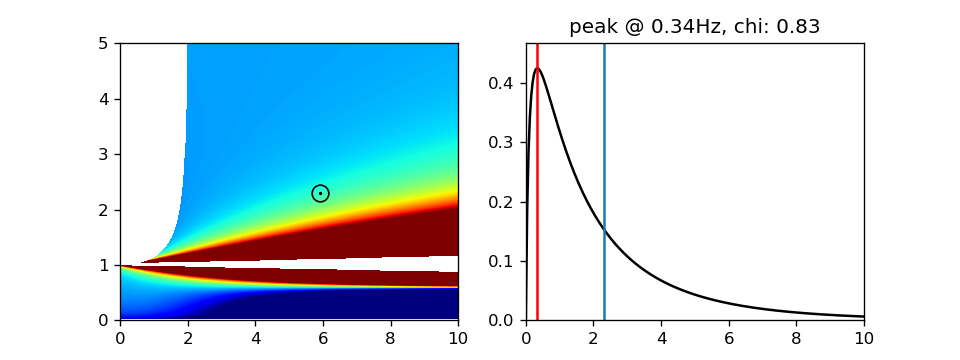

/tmp/ipykernel_9025/2224410900.py:5: RuntimeWarning: invalid value encountered in sqrt
  return gamma / ( nu_max * np.sqrt( -np.pi * np.log( NU / nu_max ) ) ) * \
/tmp/ipykernel_9025/2224410900.py:7: RuntimeWarning: invalid value encountered in sqrt
  np.cosh( gamma * delta * np.sqrt( -2 * np.log( NU / nu_max) ) )


interactive(children=(FloatSlider(value=1.5, description='$\\displaystyle \\gamma$', max=5.0, step=0.01), Floa…

In [13]:
gamma = 1.5
delta = 2.5


fig,ax = plt.subplots(1,2,figsize=(8,3))

#fig,ax = plt.subplots(1,figsize=(6,4))
chi_plt = ax[0].imshow(chi,origin='lower',extent=[*delta_range,*gamma_range],aspect='auto',cmap='jet',vmin=-2,vmax=5)
#plt.setp(ax[0],
#         xticks=np.linspace(0,steps-1,6),
#         xticklabels=np.linspace(*delta_range,6),
#         xlabel=r'$\displaystyle \delta$',
#         yticks=np.linspace(0,steps-1,6),
#         yticklabels=np.linspace(*gamma_range,6),
#         #ylabel=r'$\displaystyle \gamma$'
#        )
#fig.colorbar(chi_plt)

#mean_val = ax[1].vlines(get_nu_bar(gamma_widget.value,delta_widget.value,nu_max_widget.value),0,5)
#peak_val = ax[1].vlines(get_nu_peak(gamma_widget.value,delta_widget.value,nu_max_widget.value),0,5)
#plt.setp(ax[0],xlim=delta_range,ylim=gamma_range)

global init 
init = True
pos, = ax[0].plot(delta,gamma,'ok',ms=10,fillstyle='none')
pos_in, = ax[0].plot(delta,gamma,'ok',ms=1)
x_arr = np.linspace(1/steps,nu_max,steps)
distr, = ax[1].plot(x_arr,p_nu(x_arr,gamma,delta,30.),'k-')
        
gamma_widget = widgets.FloatSlider(gamma,min=gamma_range[0],max=gamma_range[1],step=0.01,orientation='horizontal',description=r'$\displaystyle \gamma$')
delta_widget = widgets.FloatSlider(delta,min=delta_range[0],max=delta_range[1],step=0.1,orientation='horizontal',description=r'$\displaystyle \delta$')
nu_max_widget = widgets.FloatText(nu_max)

def update_plot(gamma,delta,nu_max):
    
    ## update firing rate distribution
    x_arr = np.linspace(1/steps,nu_max,steps)
    new_distr = p_nu(x_arr,gamma,delta,nu_max)   
    
    chi = get_chi(gamma,delta,nu_max)
    #print(f'chi: {:.2f}'.format(chi))
        
    distr.set_xdata(x_arr)
    distr.set_ydata(new_distr)
    nu_peak = get_nu_peak(gamma,delta,nu_max)
    ax[1].set_title("peak @ {:.2f}Hz, chi: {:.2f}".format(nu_peak,chi))
        
    global mean_val, peak_val
    try:
        mean_val.remove()
        peak_val.remove()
    except:
        pass
        
    mean_val = ax[1].vlines(get_nu_bar(gamma,delta,nu_max),0,5)
    peak_val = ax[1].vlines(get_nu_peak(gamma,delta,nu_max),0,5,color='r')
    plt.setp(ax[1],xlim=[0,10],ylim=[0,max(new_distr)*1.1])
    
    pos.set_xdata(delta)
    pos.set_ydata(gamma)
    pos_in.set_xdata(delta)
    pos_in.set_ydata(gamma)
    
    plt.show()
    
widgets.interactive(update_plot,gamma=gamma_widget,delta=delta_widget,nu_max=nu_max_widget)